Load the pickle data object for sep=5 and do a scatter plot (code in the NA-2 writeup)

Text(0.5, 1.0, 'Ring Data - sep = 5')

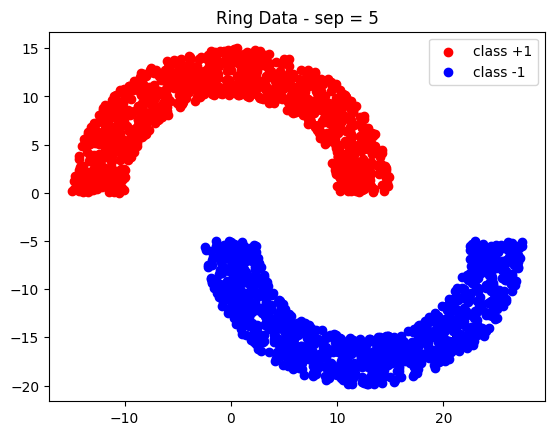

In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

filename = "data/ring_data_5.pkl"
#filename = "data/ring_data_-5.pkl"
df   = pd.read_pickle(filename)
data = df.to_numpy()
ndat,n1 = np.shape(data)
ndim    = n1-1

X      = np.transpose(data[:,0:ndim])
Y      = np.reshape(data[:,ndim],(ndat,1))

indx = np.where(Y==1)
plt.scatter(X[1,indx],X[2,indx],c='r')
indx = np.where(Y==-1)
plt.scatter(X[1,indx],X[2,indx],c='b')
plt.legend(('class +1','class -1'))
plt.title('Ring Data - sep = 5')


Fixed Increment Perceptron Learning Algorithm (PLA) using sep=5 dataset

normal termination: iter =  26


Text(0.5, 1.0, 'perceptron error = 0.0, MSE = 0.0')

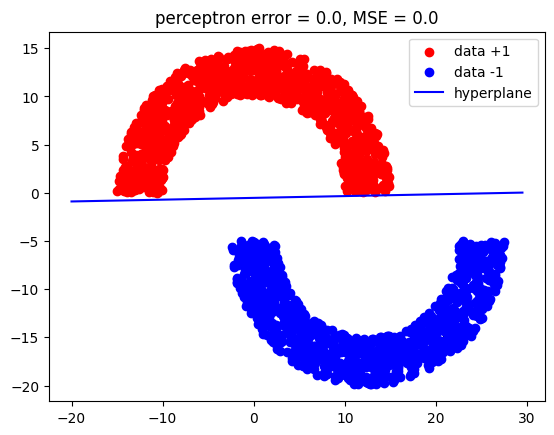

In [5]:
#perceptron learning algorithm
def perceptron(X,Y,eta,w0,maxiter):
    Jup = 1
    iter = 0
    w = np.reshape(w0,(1,len(w0)))
    errors = []
    while Jup!=0:
        Jup = 0
        for k in range(len(Y)):
            x = np.array(X[:,k])
            y = Y[k]
            z = y*x
            u = np.sum(z*w)
            error = np.sign(u)
            errors.append(error)
            if u<0:
                    w += eta*z
                    iter += 1
                    Jup=1
            if iter > maxiter:
                Jup = 0
    if (iter>maxiter):
        print("terminate on maxiter", maxiter)
    else:
        print("normal termination: iter = ",iter)
   
    _,ndim = np.shape(w)
    w = np.reshape(w,(ndim,1))
    #print(w)
    return w

eta = 1
maxiter = 1000
w0   = np.random.rand(ndim,1)      #random initial weight
w    = perceptron(X,Y,eta,w0,maxiter)
#print(w)                           #perceptron weights

x0 = np.arange(-20,30,.5)           #points for hyperplane
x1 = -w[0]/w[2]-x0*w[1]/w[2]

Yhat = np.sign((X.T)@w)             #prediction
diff = (Yhat!=Y)
accuracy = np.sum(diff.astype('int'))/len(diff) #accuracy
MSE  = (1/ndat)*np.sum((Yhat-Y)**2)             #MSE

indx = np.where(Y==1)
plt.scatter(X[1,indx],X[2,indx],c='r')
indx = np.where(Y==-1)
plt.scatter(X[1,indx],X[2,indx],c='b')
plt.plot(x0,x1,'b-')
plt.legend(('data +1','data -1','hyperplane'))
tstring = "perceptron error = {}, MSE = {}".format(accuracy,MSE)
plt.title(tstring)

We now do this using the pseudo inverse.   That optimal weight vector is  $w = {\rm inv}(XX^T)XY$ where $X$ is the input data matrix and $Y$ is the target data matrix.  The predicted output on the dataset is then given as $\hat{y} = {\rm sign}(X^T w)$

accuracy = 0.0, MSE = 0.0


Text(0.5, 1.0, 'pseudoinverse error = 0.0, MSE = 0.0')

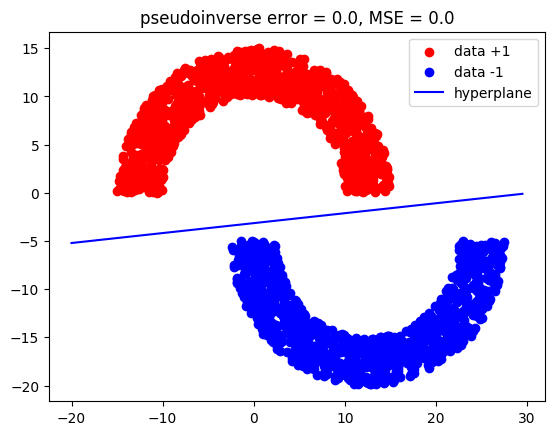

In [6]:
Xdag = np.linalg.inv(X@X.T)@X
w    = Xdag@Y

x0 = np.arange(-20,30,.5)           #points for hyperplane
x1 = -w[0]/w[2]-x0*w[1]/w[2]

Yhat = np.sign((X.T)@w)             #prediction
diff = (Yhat!=Y)
accuracy = np.sum(diff.astype('int'))/len(diff) #accuracy
MSE  = (1/ndat)*np.sum((Yhat-Y)**2)             #MSE
print("accuracy = {}, MSE = {}".format(accuracy,MSE))

indx = np.where(Y==1)
plt.scatter(X[1,indx],X[2,indx],c='r')
indx = np.where(Y==-1)
plt.scatter(X[1,indx],X[2,indx],c='b')
plt.plot(x0,x1,'b-')
plt.legend(('data +1','data -1','hyperplane'))
tstring = "pseudoinverse error = {}, MSE = {}".format(accuracy,MSE)
plt.title(tstring)

For the linearly separable dataset, we see the PLA and pseudoinverse classifiers achieve the same error rate of 0. 

We now redo this example for the nonseparable dataset where sep = -5.  Let us first try the PLA.  Note that the PLA does not converge and terminates on the maxiter=1000 condition.   The accuracy at the end is 0.09 (classfication error) and a MSE of 0.386.  Note that these numbers will change depending on how we initialize the weights.  

terminate on maxiter 1000


Text(0.5, 1.0, 'perceptron error = 0.121, MSE = 0.484')

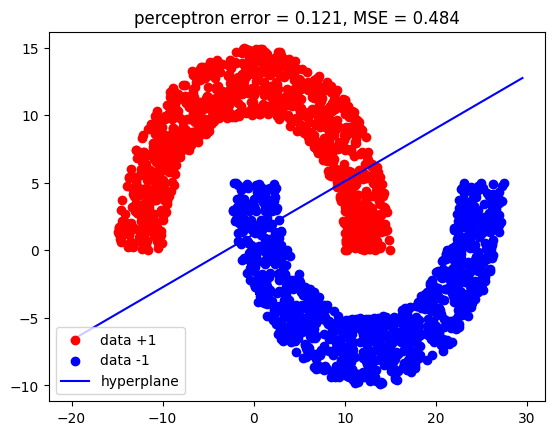

In [8]:
#filename = "data/ring_data_5.pkl"
filename = "data/ring_data_-5.pkl"
df   = pd.read_pickle(filename)
data = df.to_numpy()
ndat,n1 = np.shape(data)
ndim    = n1-1

X      = np.transpose(data[:,0:ndim])
Y      = np.reshape(data[:,ndim],(ndat,1))

eta = 1
maxiter = 1000
w0   = np.random.rand(ndim,1)      #random initial weight
w    = perceptron(X,Y,eta,w0,maxiter)
#print(w)                           #perceptron weights

x0 = np.arange(-20,30,.5)           #points for hyperplane
x1 = -w[0]/w[2]-x0*w[1]/w[2]

Yhat = np.sign((X.T)@w)             #prediction
diff = (Yhat!=Y)
accuracy = np.sum(diff.astype('int'))/len(diff) #accuracy
MSE  = (1/ndat)*np.sum((Yhat-Y)**2)             #MSE

indx = np.where(Y==1)
plt.scatter(X[1,indx],X[2,indx],c='r')
indx = np.where(Y==-1)
plt.scatter(X[1,indx],X[2,indx],c='b')
plt.plot(x0,x1,'b-')
plt.legend(('data +1','data -1','hyperplane'))
tstring = "perceptron error = {}, MSE = {}".format(accuracy,MSE)
plt.title(tstring)

Now let us repeat this for the pseudoinverse method on the nonseparable dataset.   We get an answer that is very similar to what was obtained using the PLA.  

accuracy = 0.0995, MSE = 0.398


Text(0.5, 1.0, 'pseudoinverse error = 0.0995, MSE = 0.398')

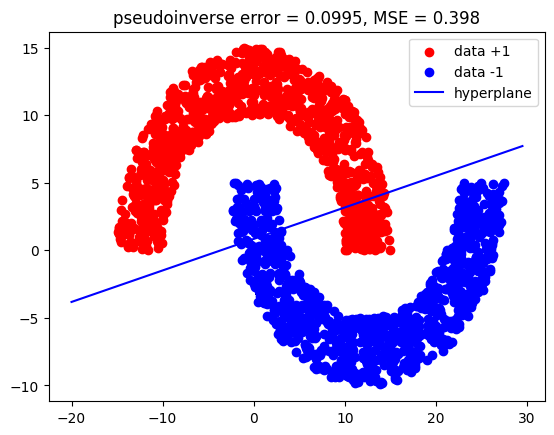

In [9]:
Xdag = np.linalg.inv(X@X.T)@X
w    = Xdag@Y

x0 = np.arange(-20,30,.5)           #points for hyperplane
x1 = -w[0]/w[2]-x0*w[1]/w[2]

Yhat = np.sign((X.T)@w)             #prediction
diff = (Yhat!=Y)
accuracy = np.sum(diff.astype('int'))/len(diff) #accuracy
MSE  = (1/ndat)*np.sum((Yhat-Y)**2)             #MSE
print("accuracy = {}, MSE = {}".format(accuracy,MSE))

indx = np.where(Y==1)
plt.scatter(X[1,indx],X[2,indx],c='r')
indx = np.where(Y==-1)
plt.scatter(X[1,indx],X[2,indx],c='b')
plt.plot(x0,x1,'b-')
plt.legend(('data +1','data -1','hyperplane'))
tstring = "pseudoinverse error = {}, MSE = {}".format(accuracy,MSE)
plt.title(tstring)

To use the 3rd order polynomials as features, we first construct a 3rd order polynomial feature data matrix

In [10]:
Xr = X[:,0:3]
print(Xr)

def poly3feature(X):
    Xnew  =  X
    ndim,ndat = np.shape(Xnew)
    x1row = Xnew[1,:]
    x2row = Xnew[2,:]
    for n in [2,3]:
        for k in np.arange(n+1):
            xnewrow = (x1row**(n-k))*(x2row**k)
            xnewrow = np.reshape(xnewrow,(1,ndat))
            #print(np.shape(xnewrow))
            Xnew = np.vstack((Xnew,xnewrow))
    return Xnew
    
Xnew = poly3feature(X)
print(np.shape(Xnew))



[[ 1.          1.          1.        ]
 [ 0.71281562 19.4392373  17.36007128]
 [-3.08217326 -5.58074237 -8.63890169]]
(10, 2000)


and then use the pseudo inverse algorithm 

In [11]:
Xdag = np.linalg.inv(Xnew@Xnew.T)@Xnew
w    = Xdag@Y

 
Yhat = np.sign((Xnew.T)@w)             #prediction
diff = (Yhat!=Y)
accuracy = np.sum(diff.astype('int'))/len(diff) #accuracy
MSE  = (1/ndat)*np.sum((Yhat-Y)**2)             #MSE

print(" accuracy = {}, MSE = {}".format(accuracy,MSE))

 accuracy = 0.0105, MSE = 0.042


and then plot the hyper-surface and data points


/var/folders/n5/97z323y53hdfh34j_jcw52dr0000gn/T/ipykernel_86074/2912857681.py:16: ComplexWarning: Casting complex values to real discards the imaginary part
  x2pp = x2pp.astype("float64")


Text(0.5, 1.0, 'polynomial features: error = 0.0105, MSE = 0.042')

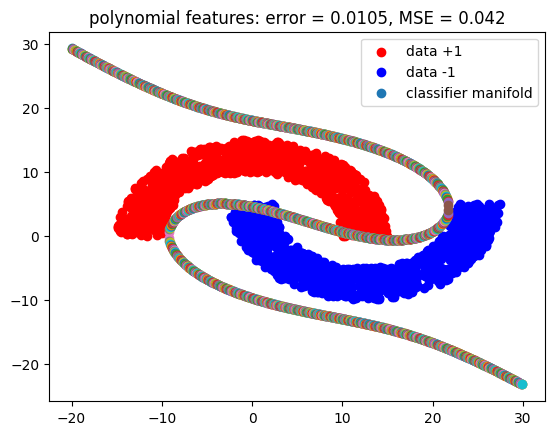

In [12]:
x0 = np.arange(-20,30,.05)           #points for hyperplane
indx = np.where(Y==1)
plt.scatter(X[1,indx],X[2,indx],c='r')
indx = np.where(Y==-1)
plt.scatter(X[1,indx],X[2,indx],c='b')

for  x1 in np.nditer(x0):
    #print(x1)
    coeff = np.array([w[9], w[5]+w[8]*x1, w[2]+w[4]*x1+w[7]*x1**2, w[0]+w[1]*x1+w[3]*x1**2+w[6]*x1**3])
    coeff = np.reshape(coeff,4)
    #print(coeff)
    x2p = np.roots(coeff)
    #print(x2p)
    indx = np.where(np.isreal(x2p))
    x2pp = x2p[indx]
    x2pp = x2pp.astype("float64")
    #print(x2pp)
    x1pp = x1*np.ones(np.shape(x2pp))
    #print(x1pp)
    plt.scatter(x1pp,x2pp)

plt.legend(('data +1','data -1','classifier manifold'))
tstring = "polynomial features: error = {}, MSE = {}".format(accuracy,MSE)
plt.title(tstring)
